# BboxImage Demo

A [BboxImage](https://matplotlib.org/api/image_api.html#matplotlib.image.BboxImage) can be used to position an image according to a bounding box. This demo shows how to show an image inside a [text.Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)'s bounding box as well as how to manually create a bounding box for the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

%matplotlib inline

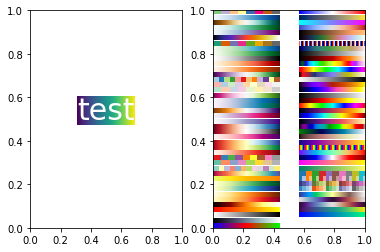

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

# ----------------------------
# Create a BboxImage with Text
# ----------------------------
txt = ax1.text(0.5, 0.5, "test", size=30, ha="center", color="w")
kwargs = dict()

bbox_image = BboxImage(txt.get_window_extent,
                       norm=None,
                       origin=None,
                       clip_on=False,
                       **kwargs
                       )
a = np.arange(256).reshape(1, 256)/256.
bbox_image.set_data(a)
ax1.add_artist(bbox_image)

# ------------------------------------
# Create a BboxImage for each colormap
# ------------------------------------
a = np.linspace(0, 1, 256).reshape(1, -1)
a = np.vstack((a, a))

# List of all colormaps; skip reversed colormaps.
maps = sorted(m for m in plt.cm.cmap_d if not m.endswith("_r"))

ncol = 2
nrow = len(maps)//ncol + 1

xpad_fraction = 0.3
dx = 1./(ncol + xpad_fraction*(ncol - 1))

ypad_fraction = 0.3
dy = 1./(nrow + ypad_fraction*(nrow - 1))

for i, m in enumerate(maps):
    ix, iy = divmod(i, nrow)

    bbox0 = Bbox.from_bounds(ix*dx*(1 + xpad_fraction),
                             1. - iy*dy*(1 + ypad_fraction) - dy,
                             dx, dy)
    bbox = TransformedBbox(bbox0, ax2.transAxes)

    bbox_image = BboxImage(bbox,
                           cmap=plt.get_cmap(m),
                           norm=None,
                           origin=None,
                           **kwargs
                           )

    bbox_image.set_data(a)
    ax2.add_artist(bbox_image)

plt.show()